## WEEK 9 ACTIVITY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
df=pd.read_csv(r"C:\Users\jinoj\OneDrive\Desktop\employee.csv")
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [3]:
df.shape

(9, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


### 2. Reset the index as "name".

In [5]:
df=pd.read_csv(r"C:\Users\jinoj\OneDrive\Desktop\employee.csv",index_col='name')
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.

In [6]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [7]:
df.loc[df['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [8]:
df.loc[df['performance_score'] >= 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score

In [9]:
df.loc[(df['performance_score']> 500) & (df['performance_score'] < 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset.

In [10]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [11]:
df.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [12]:
df.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

we can see missing values in the field of age, income and gender.
Age and income are float values while gender is a categorical object.
So for age and income we can use median as filling value and use backwardfill .

In [13]:
for i in ['age','income']:
    df[i]=df[i].fillna(df[i].median())
    df['gender']=df['gender'].fillna(df['gender'].bfill())
    df

In [14]:
df['age'] = df['age'].astype('int') #we know age is an int value
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45,52000.0,F,Operations,G3,723
S Kumar,45,16000.0,F,Finance,G0,520
Jack Morgan,32,35000.0,M,Finance,G2,674
Ying Chin,45,65000.0,F,Sales,G3,556
Dheeraj Patel,30,42000.0,F,Operations,G2,711
Satyam Sharma,45,62000.0,F,Sales,G3,649
James Authur,54,52000.0,F,Operations,G3,53
Josh Wills,54,52000.0,F,Finance,G3,901
Leo Duck,23,98000.0,M,Sales,G4,709


In [15]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

### 8. Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Box plot of age')

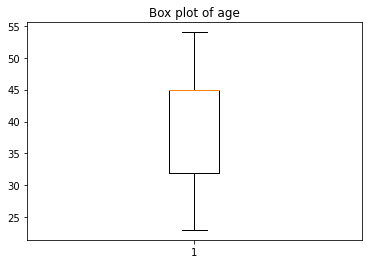

In [19]:
plt.boxplot(df['age'])
plt.title('Box plot of age')

Text(0.5, 1.0, 'Box plot of income')

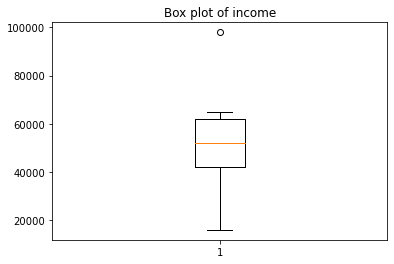

In [20]:
plt.boxplot(df['income'])
plt.title('Box plot of income')

one outlier in income

Text(0.5, 1.0, 'Box plot of performance score')

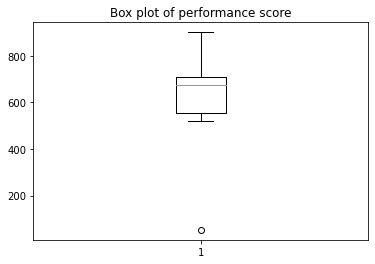

In [21]:
plt.boxplot(df['performance_score'])
plt.title('Box plot of performance score')

In [22]:
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [23]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

323.5
943.5


In [24]:
outlier=[]
for x in df['performance_score']:
    if((x> up_limit) or (x<low_limit)):
        outlier.append(x)

In [25]:
outlier

[53]

In [26]:
ind=df['performance_score']<low_limit
df.loc[ind].index

Index(['James Authur'], dtype='object', name='name')

In [27]:
df.drop(['James Authur'],inplace=True)

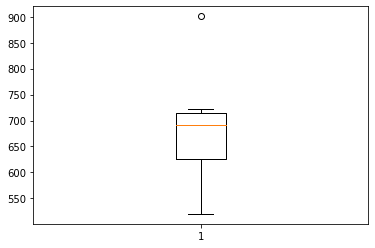

In [28]:
plt.boxplot(df['performance_score'])
plt.show()

### 9. Check the gender column and do Dummy encoding.

In [29]:
df['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [30]:
df1=pd.get_dummies(df,columns=['gender'],drop_first=True)
df1

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45,52000.0,Operations,G3,723,0
S Kumar,45,16000.0,Finance,G0,520,0
Jack Morgan,32,35000.0,Finance,G2,674,1
Ying Chin,45,65000.0,Sales,G3,556,0
Dheeraj Patel,30,42000.0,Operations,G2,711,0
Satyam Sharma,45,62000.0,Sales,G3,649,0
Josh Wills,54,52000.0,Finance,G3,901,0
Leo Duck,23,98000.0,Sales,G4,709,1


### 10. Do the standard scaling on the feature performance score.

In [32]:
type(df)

pandas.core.frame.DataFrame

In [33]:
df.describe()

,age,income,performance_score
count,8.000000,8.000000,8.00000
mean,39.875000,52750.000000,680.37500
std,10.343217,24099.496142,116.16729
min,23.000000,16000.000000,520.00000
25%,31.500000,40250.000000,625.75000
50%,45.000000,52000.000000,691.50000
75%,45.000000,62750.000000,714.00000
max,54.000000,98000.000000,901.00000


In [35]:
from sklearn.preprocessing import StandardScaler
standardization=StandardScaler()
df['performance_score'] =standardization.fit_transform(df[['performance_score']])
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45,52000.0,F,Operations,G3,0.392262
S Kumar,45,16000.0,F,Finance,G0,-1.475872
Jack Morgan,32,35000.0,M,Finance,G2,-0.058667
Ying Chin,45,65000.0,F,Sales,G3,-1.144578
Dheeraj Patel,30,42000.0,F,Operations,G2,0.281831
Satyam Sharma,45,62000.0,F,Sales,G3,-0.288733
Josh Wills,54,52000.0,F,Finance,G3,2.030331
Leo Duck,23,98000.0,M,Sales,G4,0.263425
